In [7]:
# Import Libraries #

import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import numpy as np
import pickle

%matplotlib inline

In [8]:
# Define Shape-File #

global_map = gpd.read_file('ne_110m_ocean.shp')

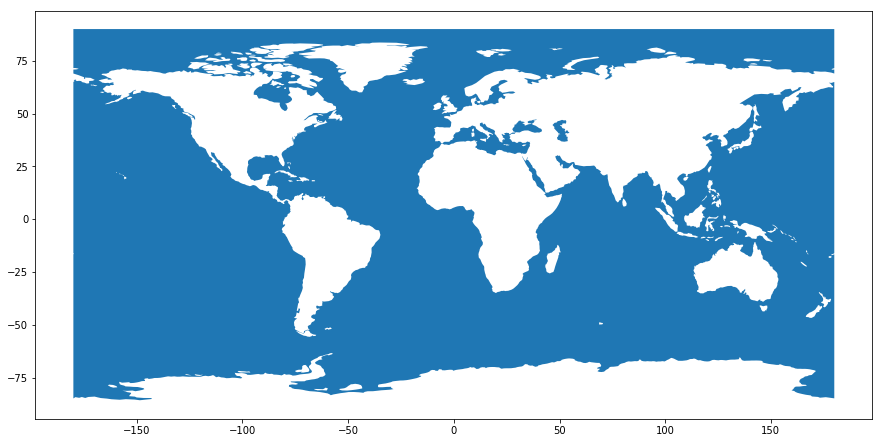

In [9]:
# Plot Shape-File #

fig,ax = plt.subplots(figsize = (15,15))
global_map.plot(ax = ax)

In [13]:
# Create 'Hurricane' Class (From 'Create Time Series') #

class Hurricane:
    def __init__(self, ocean, id_no, year, name, length, hurr_data ):
        self.ocean = ocean
        self.id_no = id_no
        self.year = year
        self.name = name
        self.length = length
        self.hurr_data = hurr_data

In [14]:
# Define 'load_hurr_data' Function (From 'Create Time Series') #

def load_hurr_data():
    filename = r'pickledump.txt'
    filehandler = open(filename, 'rb') 
    new_stuff = pickle.load(filehandler)
    return new_stuff

In [15]:
# Define 'hurricanes' (From 'Create Time Series') #

hurricanes = load_hurr_data()

In [62]:
# Define First Hurricane DataFrame #

hurricane_1 = hurricanes[69].hurr_data
crs = {'init': 'epsg:4326'}

In [57]:
# Define Points Traveled by Hurricane #

geometry = [Point(xy) for xy in zip(-hurricane_1["Longitude"], hurricane_1["Latitude"])]

In [58]:
# Create Geo Data Frame for Hurricane 1 #

geo_df_1 = gpd.GeoDataFrame(hurricane_1, crs = crs, geometry = geometry)

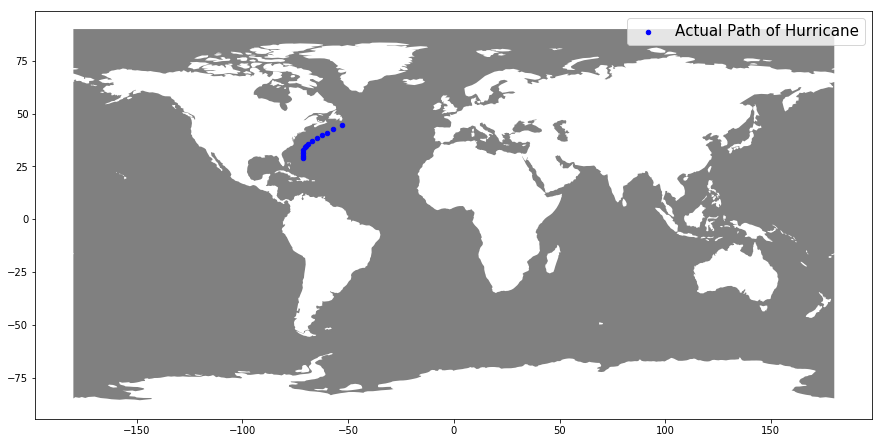

In [61]:
# Plot the Earth with Hurricane 1 Tracked Over It #

fig,ax = plt.subplots(figsize = (15,15))
global_map.plot(ax = ax, color = 'grey')
geo_df_1.plot(ax = ax, markersize = 20, color = 'blue', marker = 'o', label = 'Actual Path of Hurricane')
plt.legend(prop = {'size':15})